# 模拟投资策略

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

data_path = os.environ.get('DATA_PATH')

In [ ]:
sns.set_style('whitegrid')
plt.style.use('default')

In [3]:
dataframe = pd.read_csv(data_path + 'AI_Cheats/all_stocks_5yr.csv')
dataframe

,Unnamed: 0,Date,Open,High,Low,Close,Volume,name
0,0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...,...
619035,619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [4]:
dataframe.drop(['Unnamed: 0'], axis=1, inplace=True)
df = dataframe
df

,Date,Open,High,Low,Close,Volume,name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [5]:
df['name'].nunique()

505

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [7]:
# 交易日情况
open_dates = np.unique(df.Date)
len(open_dates)

1259

In [8]:
# 转化为 Pandas 内的日期类型
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Volume,name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


In [9]:
df.dtypes
df.name.value_counts().head(5)

name
AAL     1259
NRG     1259
NOC     1259
NLSN    1259
NKE     1259
Name: count, dtype: int64

<Axes: xlabel='Date'>

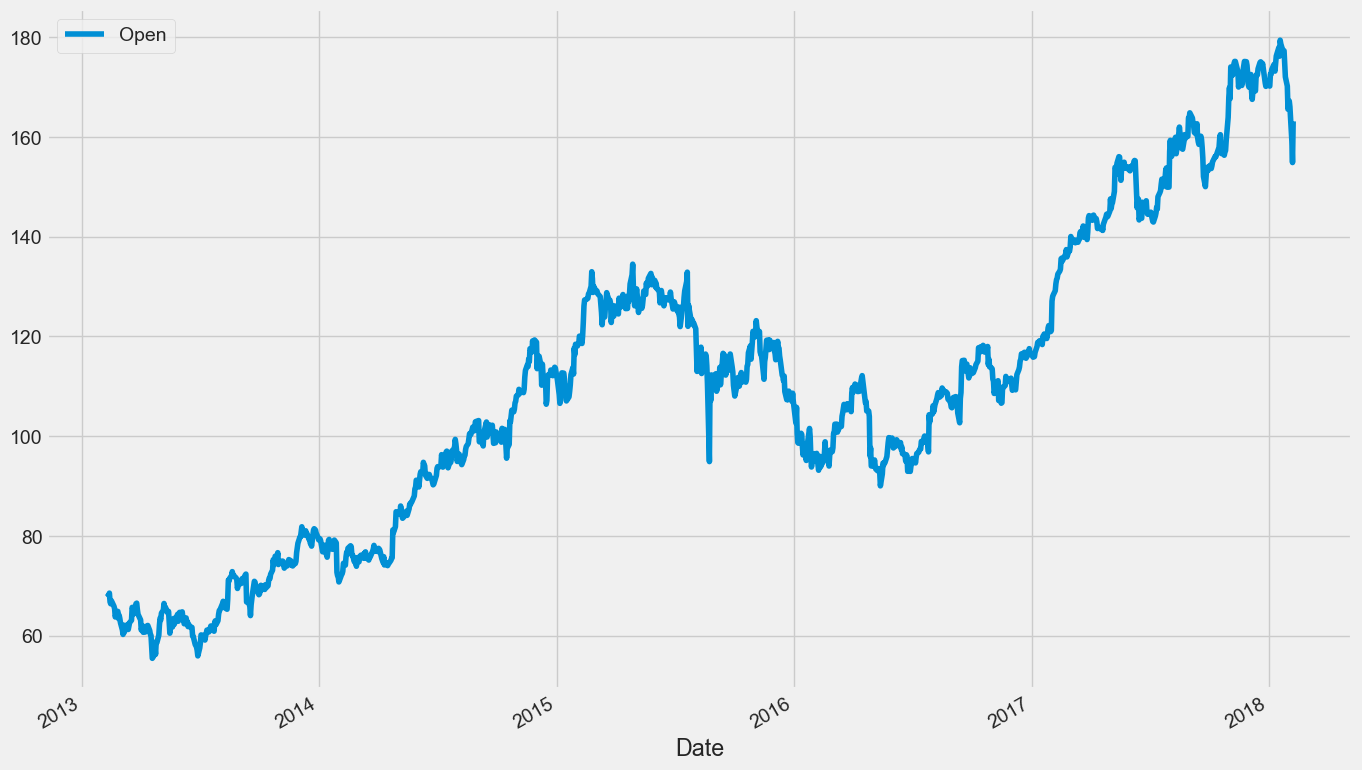

In [10]:
# 筛选平果这只股票
sub_df = df[df.name=='AAPL']
sub_df.head()
sub_df.plot.line(x='Date', y='Open', figsize=(15, 10))

In [11]:
# 计算投资组合价值
def get_portfolio_value(port, evaluation_date):
    if evaluation_date not in open_dates:
        print('Market closed for today')
        return 0
    # 总价值
    total_value = 0
    # 累加每支股票的 value
    for stock in port.keys():
        if stock == 'cash':
            total_value += port['cash']
            continue
        # 找到 evaluation_date 时，该股票的 price
        stock_price = df[(df.name==stock) & (df.Date==evaluation_date)].iloc[0]['Close']
        # 计算该股票的 value
        position = stock_price * port[stock]
        total_value += position
    # 打印当前的 portfolio
    # print(port)  
    return total_value

In [12]:
def portfolio_buy(port, purchase_day, stock_name, num):
    # 如果不开市
    if purchase_day not in open_dates:
        print('Market closed for today')
        return port
    # 计算股票需要购买的金额
    stock_price = df[(df.name==stock_name) & (df.Date==purchase_day)].iloc[0]['Open']
    order_price = stock_price * num
    # 考虑 portfolio 钱够不够的问题
    if port['cash'] < order_price:
        # 没买成，原封不动
        return port
    # 购买成公，cash 减少
    port['cash'] -= order_price
    # 如果之前没有持有过这个股票
    if stock_name not in port.keys():
        port[stock_name] = num
        return port
    elif stock_name in port.keys():
        port[stock_name] += num
        return port
    else:
        print('Error')
        return port

In [13]:
def portfolio_sell(port, sell_day, stock_name, num):
    # 如果不开市
    if sell_day not in open_dates:
        print('Market closed for today')
        return port
    # 计算卖出的股票金额
    stock_price = df[(df.name==stock_name) & (df.Date==sell_day)].iloc[0]['Close']
    order_price=stock_price * num
    # 如果之前没有持有过这个股票
    if stock_name not in port.keys():
        # 没卖成，原封不动
        return port
    # 如果卖出的数量 > 手上持有的数量，没卖成
    if num > port[stock_name]:
        return port
    # 卖成功了，减少股票数量，增加 cash
    if stock_name in port.keys():
        port[stock_name] -= num
        port['cash'] += order_price
        return port

In [14]:
# 假设初始资金 10000
portfolio = dict()
portfolio['cash'] = 10000

In [15]:
portfolio

{'cash': 10000}

In [16]:
# 买入两只股票
portfolio_buy(portfolio, '2016-01-04', 'AAPL', 10)
portfolio_buy(portfolio, '2016-01-04', 'GOOG', 10)

{'cash': 1543.8999999999996, 'AAPL': 10, 'GOOG': 10}

In [17]:
# 当下今天的情况
get_portfolio_value(portfolio, '2016-01-04')

10015.8

In [18]:
# 卖股票
portfolio_sell(portfolio, '2017-02-01', 'AAPL', 20)

{'cash': 1543.8999999999996, 'AAPL': 10, 'GOOG': 10}

In [19]:
get_portfolio_value(portfolio, '2017-02-01')

10788.35

In [20]:
## 策略模拟
#
# 假设我们模拟 2017-01-03 开始，初始资金 10000 元，大家各自选择购买策略，比 2017 年最后一个交易日：2017-12-30
#
## 策略 1: 2016-2017 年，按照过去 1 年涨幅排序，直接全仓购买最好的
#

# 筛选 2016-2017 年的股票数据
year_2016_df = df[
    (df.Date >= pd.to_datetime('2016-01-01', format='%Y-%m-%d', errors='ignore')) &
    (df.Date <= pd.to_datetime('2017-01-01', format='%Y-%m-%d', errors='ignore'))
]

year_2016_df

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_54001/1428356588.py:10: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  (df.Date >= pd.to_datetime('2016-01-01', format='%Y-%m-%d', errors='ignore')) &
/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_54001/1428356588.py:11: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  (df.Date <= pd.to_datetime('2017-01-01', format='%Y-%m-%d', errors='ignore'))


,Date,Open,High,Low,Close,Volume,name
730,2016-01-04,41.2900,41.3501,40.30,40.91,12037151,AAL
731,2016-01-05,41.1800,41.4900,39.95,40.52,10514164,AAL
732,2016-01-06,40.0500,41.7000,40.00,41.23,12393780,AAL
733,2016-01-07,40.9700,41.5200,39.68,40.45,11312876,AAL
734,2016-01-08,40.9400,41.3600,40.26,40.37,8853096,AAL
...,...,...,...,...,...,...,...
618758,2016-12-23,53.2000,53.7800,53.18,53.78,1942469,ZTS
618759,2016-12-27,53.7800,54.1500,53.65,53.72,1344976,ZTS
618760,2016-12-28,53.7600,53.8500,53.35,53.44,1241854,ZTS
618761,2016-12-29,53.4747,53.7790,53.40,53.62,1047017,ZTS


In [21]:
best_stock = 'Not sure yet'
growth = -1

# 使用打擂法，寻找在 2016 年的 best_stock
for stock in list(year_2016_df.name.unique()):
    # 计算每支股票的涨幅 stock_growth
    sub_df = year_2016_df[year_2016_df.name==stock]
    open_price = sub_df[sub_df.Date==min(sub_df.Date)].iloc[0]['Open']
    close_price = sub_df[sub_df.Date==max(sub_df.Date)].iloc[0]['Open']
    stock_growth = round(100*(close_price-open_price) / open_price, 3)
    # print(stock, ':', stock_growth)
    # 找到涨幅最高的股票
    if stock_growth > growth:
        best_stock = stock
        growth = stock_growth

# AMD 涨幅达到 322.383%
print(best_stock, ':', growth)

AMD : 322.383


In [22]:
# 假设初始资金 10000
portfolio = dict()
portfolio['cash'] = 10000
portfolio['cash']

10000

In [23]:
# 计算能买多少股
valid_num = int(portfolio['cash'] / df[(df.name=='AMD') & (df.Date=='2017-01-03')].iloc[0]['Open'])
valid_num

875

In [24]:
# 在 2017 年初，重仓 AMD
portfolio_buy(portfolio, '2017-01-03', 'AMD', valid_num)

{'cash': 7.5, 'AMD': 875}

In [25]:
# 计算 2017 年底，投资组合 value
get_portfolio_value(portfolio, '2017-12-29')

9002.5

In [26]:
# 统计 2017 年的交易日
trade_days_2017 = sorted(np.unique(df[
    (df.Date >= pd.to_datetime('2017-01-01', format='%Y-%m-%d', errors='ignore')) & 
    (df.Date < pd.to_datetime('2018-01-01', format='%Y-%m-%d', errors='ignore'))
]['Date'].apply(lambda x: str(x)[0:10])))
trade_days_2017

/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_54001/3041065157.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  (df.Date >= pd.to_datetime('2017-01-01', format='%Y-%m-%d', errors='ignore')) &
/var/folders/z4/ytcxq0ps02v3py23b74t70kh0000gn/T/ipykernel_54001/3041065157.py:4: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  (df.Date < pd.to_datetime('2018-01-01', format='%Y-%m-%d', errors='ignore'))


['2017-01-03',
 '2017-01-04',
 '2017-01-05',
 '2017-01-06',
 '2017-01-09',
 '2017-01-10',
 '2017-01-11',
 '2017-01-12',
 '2017-01-13',
 '2017-01-17',
 '2017-01-18',
 '2017-01-19',
 '2017-01-20',
 '2017-01-23',
 '2017-01-24',
 '2017-01-25',
 '2017-01-26',
 '2017-01-27',
 '2017-01-30',
 '2017-01-31',
 '2017-02-01',
 '2017-02-02',
 '2017-02-03',
 '2017-02-06',
 '2017-02-07',
 '2017-02-08',
 '2017-02-09',
 '2017-02-10',
 '2017-02-13',
 '2017-02-14',
 '2017-02-15',
 '2017-02-16',
 '2017-02-17',
 '2017-02-21',
 '2017-02-22',
 '2017-02-23',
 '2017-02-24',
 '2017-02-27',
 '2017-02-28',
 '2017-03-01',
 '2017-03-02',
 '2017-03-03',
 '2017-03-06',
 '2017-03-07',
 '2017-03-08',
 '2017-03-09',
 '2017-03-10',
 '2017-03-13',
 '2017-03-14',
 '2017-03-15',
 '2017-03-16',
 '2017-03-17',
 '2017-03-20',
 '2017-03-21',
 '2017-03-22',
 '2017-03-23',
 '2017-03-24',
 '2017-03-27',
 '2017-03-28',
 '2017-03-29',
 '2017-03-30',
 '2017-03-31',
 '2017-04-03',
 '2017-04-04',
 '2017-04-05',
 '2017-04-06',
 '2017-04-

In [27]:
# 计算在 2017 年不同交易日的 value
value = []
for trading_date in trade_days_2017:
    value.append(get_portfolio_value(portfolio, trading_date))

value

[10008.75,
 10008.75,
 9842.5,
 9912.5,
 10061.25,
 10017.5,
 9807.5,
 9422.5,
 9265.0,
 8600.0,
 8652.5,
 8556.25,
 8538.75,
 8678.75,
 9142.5,
 9063.75,
 9212.5,
 9343.75,
 9291.25,
 9081.25,
 10560.0,
 10752.5,
 10717.5,
 11933.75,
 11636.25,
 11872.5,
 11750.0,
 11890.0,
 11811.25,
 11610.0,
 11645.0,
 11356.25,
 11496.25,
 12257.5,
 12502.5,
 12537.5,
 12362.5,
 13307.5,
 12660.0,
 13097.5,
 12170.0,
 11408.75,
 11417.5,
 11426.25,
 11575.0,
 11671.25,
 12178.75,
 12502.5,
 12345.0,
 12240.0,
 11951.25,
 11811.25,
 12607.5,
 12100.0,
 12345.0,
 12073.75,
 11995.0,
 11995.0,
 11986.25,
 12003.75,
 12301.25,
 12738.75,
 12817.5,
 12397.5,
 12406.25,
 11618.75,
 11837.5,
 11470.0,
 11470.0,
 11172.5,
 10778.75,
 11198.75,
 11338.75,
 11242.5,
 11478.75,
 11382.5,
 11496.25,
 11811.25,
 11741.25,
 11925.0,
 11645.0,
 11925.0,
 9037.5,
 9098.75,
 8845.0,
 8923.75,
 8792.5,
 8915.0,
 9448.75,
 9693.75,
 9860.0,
 10000.0,
 11163.75,
 9807.5,
 9873.125,
 9991.25,
 9667.5,
 9536.25,
 9536.

In [28]:
port_value_line = pd.DataFrame({'d':trade_days_2017, 'value':value})

<Axes: xlabel='d'>

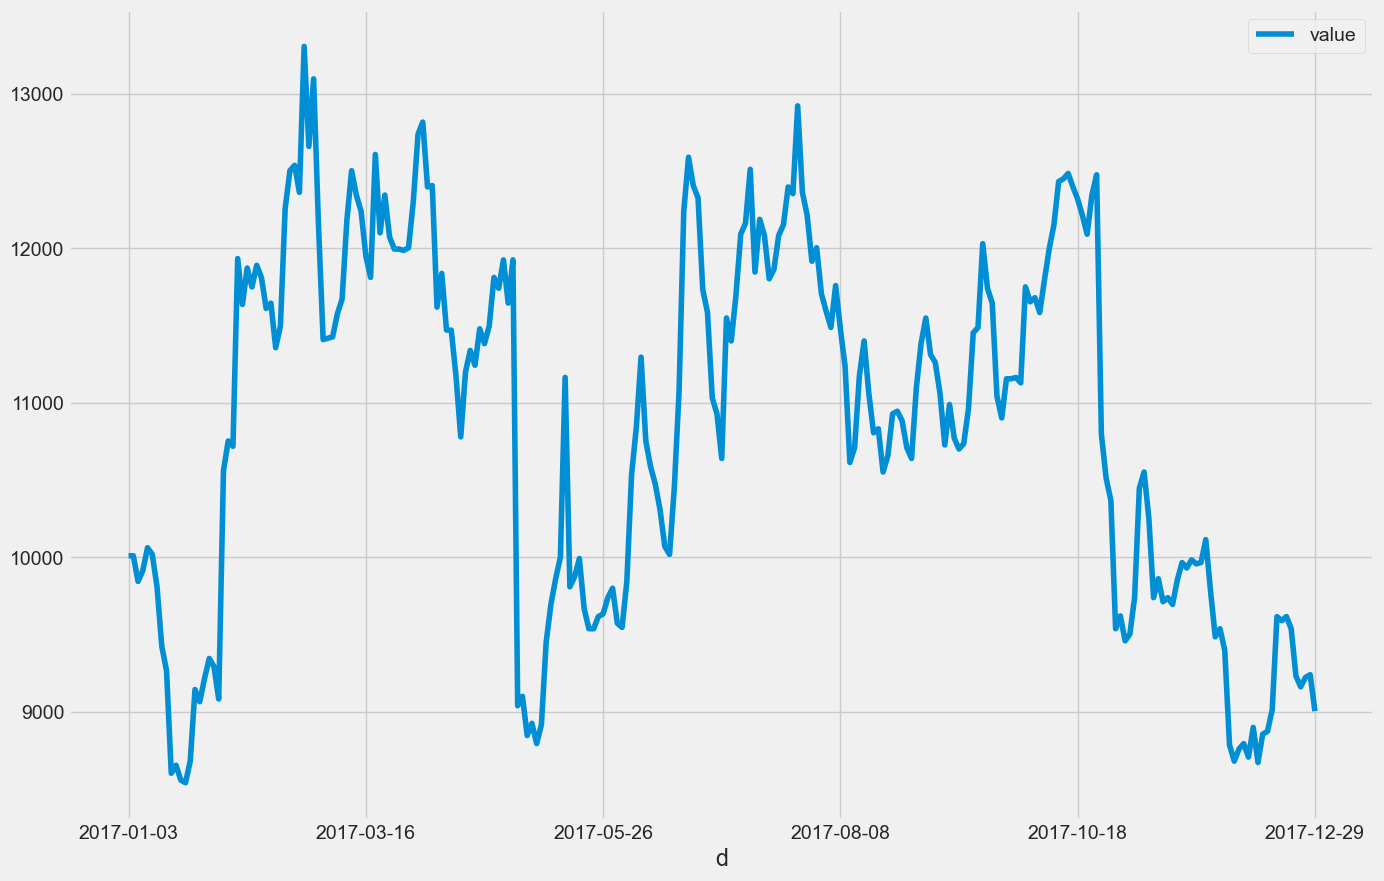

In [29]:
# 在 2017 年不同交易日的 value 变化
port_value_line.plot.line(x='d', y='value', figsize=(15,10))